In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# CUSTOMIZATION

import seaborn as sns
import matplotlib

# font type
matplotlib.rcParams['text.usetex'] = True
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman')

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman'})

# color
sns.set_palette("muted")


# font size
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Max Admissible Errors

The condition

$$ \epsilon < \min\left\{\max\left\{ \frac{\left \|L_\mathbf{g}h(\mathbf{x}) \right\|}{2\mathfrak{L}_{L_\mathbf{g}h}}, \frac{L_\mathbf{f}h(\mathbf{x}) +  \alpha(h(\mathbf{x}))}{2(\mathfrak{L}_{L_\mathbf{f}h} + \mathfrak{L}_{\alpha \circ h})} \right\}, \right\} $$



In [3]:
from max_feasible_error import get_gridded_eps

theta_eq = 0.138324423615

state_labels = ['$x$', '$y$', '$\\theta_z$', '$\\dot{x}$', '$\\dot{\\theta}_z$', '$\\theta_y$', '$\\dot{\\theta}_y$']


# # specifying upper_bd, lower_bd, num_grid
# grid_limits = np.array([[0, 0, 1], # x 
#                         [0, 0, 1], # y
#                         [0, 0, 1], # theta_z
#                         [-2, 2, 20], # xd
#                         [0, 0, 1], # thetad_z
#                         [-0.5+theta_eq, 0.5+theta_eq, 30], # theta_y
#                         [-2, 2, 30]]) # thetad_y

eps_grid, pos = get_gridded_eps()

In [4]:
np.unique(pos[:,0])

array([-0.362     , -0.32751724, -0.29303448, -0.25855172, -0.22406897,
       -0.18958621, -0.15510345, -0.12062069, -0.08613793, -0.05165517,
       -0.01717241,  0.01731034,  0.0517931 ,  0.08627586,  0.12075862,
        0.15524138,  0.18972414,  0.2242069 ,  0.25868966,  0.29317241,
        0.32765517,  0.36213793,  0.39662069,  0.43110345,  0.46558621,
        0.50006897,  0.53455172,  0.56903448,  0.60351724,  0.638     ])

In [5]:
eps_grid

eps_per_theta = []

for x5 in np.unique(pos[:,0]):
    eps_per_theta.append(np.min(eps_grid[pos[:,0]==x5]))

Text(0.5, 0, '$\\theta - \\theta_*$')

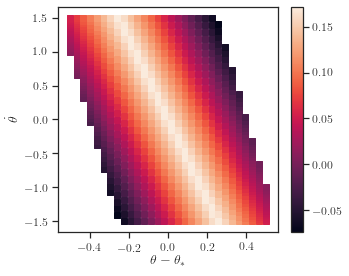

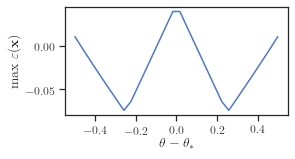

In [6]:
plt.figure(figsize=[5,4])

# plt.imshow(eps_grid_2d, extent=[-1,1,grid_limits[5, 0],grid_limits[5, 1]])
# X , Y = np.meshgrid( np.linspace(*grid_limits[5])-theta_eq , np.linspace(*grid_limits[6]) )


color = eps_grid
# color[eps_grid<0] = 0
plt.scatter(pos[:,0]-theta_eq, pos[:,1], c=eps_grid.flatten(), marker='s')
# plt.imshow(eps_grid.T) #, extent=[grid_limits[5, 0],grid_limits[5, 1],grid_limits[6, 0],grid_limits[6, 1]])
# plt.ylim([-1,1])
plt.ylabel('$\dot{\\theta}$')
# plt.plot(np.linspace(*grid_limits[5])-theta_eq, eps_grid.flatten())
plt.xlabel('$\\theta - \\theta_*$')
# plt.ylabel('upper bound on $\\varepsilon(\mathbf x)$')
plt.colorbar()
plt.tight_layout()

plt.figure(figsize=[4,2])
plt.plot(np.unique(pos[:,0])-theta_eq, eps_per_theta)
plt.ylabel('max $\\varepsilon(\mathbf x)$')
plt.xlabel('$\\theta - \\theta_*$')

In [7]:
eps_grid.shape

(30, 30)

# Training Data

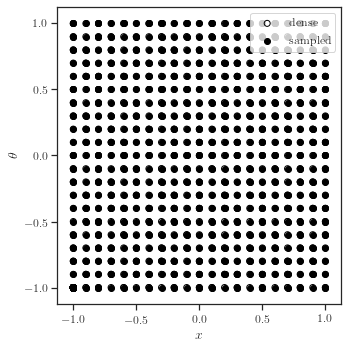

In [47]:
from train_models import get_test_train_data

train_data_fns = ['gridded_data.csv', 'gridded_data.csv'] # TODO two different training sets

plt.figure(figsize=[5,5])
plot_kwargs_list = [dict(label='dense', marker='o', color="none", edgecolor="black"),
                    dict(label='sampled', marker='o', color='black')]
# i = 0
for train_data_fn, kwargs in zip(train_data_fns, plot_kwargs_list):
    data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
    states = data['states']
#     plt.subplot(1,2,1+i)
#     i += 1
    plt.scatter(states[:,0], states[:,5], **kwargs)
    plt.xlabel('$x$')
    plt.ylabel('$\\theta$')
plt.legend()
plt.tight_layout()

In [23]:
np.sqrt(data['states'].shape[0])

27.40437921208944

# Errors

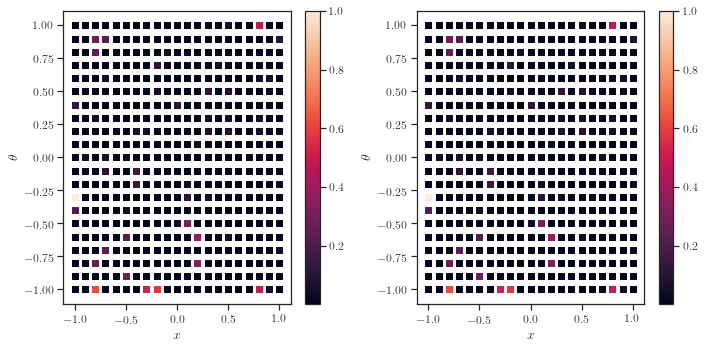

In [13]:
from train_models import get_test_train_data
from sklearn.metrics.pairwise import rbf_kernel


train_data_fns = ['gridded_data.csv', 'gridded_data.csv']  # TODO two different training sets
greyscale = True
downscale = 2
image_tag = ''
if greyscale:
    image_tag += '_grey'
if downscale:
    image_tag += '_' + str(downscale)

test_data = 'uniform'


val_data_fn = 'gridded_data.csv' # TODO: need validation data
Xs, ys = get_test_train_data(val_data_fn, None,
                             greyscale=True, downscale=2)

plt.figure(figsize=[10,5])
i = 0
for train_data_fn in train_data_fns:

    filetag = '_train{}_test{}{}'.format(train_data_fn, test_data, image_tag)

    # loading model parameters
    data = np.load('../data/coeff{}.npz'.format(filetag))
    coeff = data['coeff'] # n_train by n_target
    gamma = data['gamma'] # scalar parameter for RBF kernel
    Xs_train = data['Xs_train'] # n_train by n_features training data


    # prediction
    K = rbf_kernel(Xs, Xs_train, gamma=gamma)
    ys_pred = np.dot(K, coeff)

    errs = np.linalg.norm(ys-ys_pred, axis=1)
    
    plt.subplot(1,2,1+i)
    i += 1

    plt.scatter(states[:,0], states[:,5], c=errs, marker='s')

    plt.xlabel('$x$')
    plt.ylabel('$\\theta$')
    plt.colorbar()
plt.tight_layout()
    


    # plt.figure(figsize=[10,5])
    # i = 0
    # for train_data_fn in train_data_fns:
    #     data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
    #     states = data['states']
    #     plt.subplot(1,2,1+i)
    #     i += 1
    #     plt.scatter(states[:,0], states[:,5], marker='x')
    #     plt.xlabel('$x$')
    #     plt.ylabel('$\\theta$')
    # plt.tight_layout()

array([5.18586870e-06, 4.88495610e-05, 4.88495610e-05, 6.77099640e-05,
       4.80136163e-01, 4.80136163e-01, 1.19700439e-05, 3.18354610e-06,
       3.18354610e-06, 5.00092208e-02, 4.99907792e-02, 3.61890604e-05,
       2.07916948e-05, 2.07916948e-05, 8.89851813e-05, 9.90110633e-06,
       9.90110633e-06, 1.62732155e-05, 1.53260702e-05, 1.53260702e-05,
       2.20431302e-05, 2.29908512e-05, 2.29908512e-05, 5.27027050e-06,
       5.27027050e-06, 9.56678377e-06, 6.96785387e-06, 6.96785387e-06,
       1.47363585e-05, 8.21502796e-06, 8.21502796e-06, 9.93049547e-06,
       2.32461268e-06, 2.32461268e-06, 1.00070715e-01, 7.07203072e-05,
       1.59222264e-05, 7.94555977e-06, 7.94555977e-06, 1.62848965e-05,
       6.83093125e-06, 6.83093125e-06, 1.79124063e-05, 1.20648929e-05,
       1.20648929e-05, 7.67765848e-06, 1.00858907e-05, 1.00858907e-05,
       1.01692468e-05, 1.01692468e-05, 4.41096649e-06, 5.95468682e-06,
       5.95468682e-06, 1.59032852e-05, 9.16151713e-06, 9.16151713e-06,
      

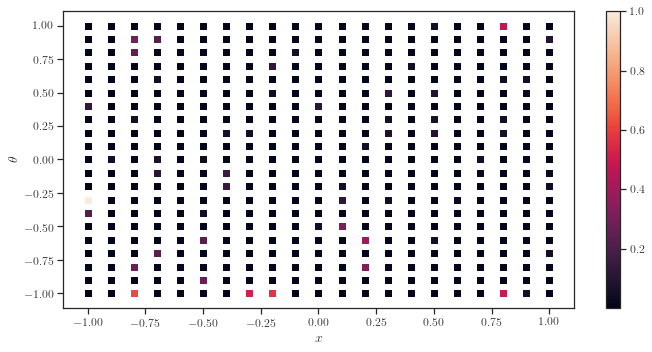

In [12]:
from matplotlib import cm

errs = np.linalg.norm(ys-ys_pred, axis=1)

plt.figure(figsize=[10,5])
plt.scatter(states[:,0], states[:,5], c=errs, marker='s')

# norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
# cmap = cm.PRGn


# levels = np
# plt.contourf(states[:,0], states[:,5], errs, levels, norm=norm,
#                      cmap=cm.get_cmap(cmap, len(levels) - 1))



plt.xlabel('$x$')
plt.ylabel('$\\theta$')
plt.tight_layout()
plt.colorbar()


# plt.figure(figsize=[10,5])
# i = 0
# for train_data_fn in train_data_fns:
#     data = np.load('../data/' + train_data_fn.split('.')[0] + '_processed.npz')
#     states = data['states']
#     plt.subplot(1,2,1+i)
#     i += 1
#     plt.scatter(states[:,0], states[:,5], marker='x')
#     plt.xlabel('$x$')
#     plt.ylabel('$\\theta$')
# plt.tight_layout()